# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Dataset Description

In [2]:
car_data = pd.read_csv("autos.csv")

In [3]:
car_data = car_data.query("yearOfRegistration <= 2020 & yearOfRegistration >= 2000")

In [4]:
car_data.shape

(267784, 21)

## Columns Description

- dateCrawled - When this ad was first crawled. All field-values are taken from this date.
- name - Name of the car.
- seller - Whether the seller is private or a dealer.
- offerType - The type of listing
- price - The price on the ad to sell the car.
- abtest - Whether the listing is included in an A/B test.
- vehicleType - The vehicle Type.
- yearOfRegistration - The year in which the car was first registered.
- gearbox - The transmission type.
- powerPS - The power of the car in PS.
- model - The car model name.
- kilometer - How many kilometers the car has driven.
- monthOfRegistration - The month in which the car was first registered.
- fuelType - What type of fuel the car uses.
- brand - The brand of the car.
- notRepairedDamage - If the car has a damage which is not yet repaired.
- dateCreated - The date on which the eBay listing was created.
- nrOfPictures - The number of pictures in the ad.
- postalCode - The postal code for the location of the vehicle.
- lastSeenOnline - When the crawler saw this ad last online.

In [5]:
car_data.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
6,6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,...,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39


# Data Cleaning and Transformation

## Column Exploration

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267784 entries, 1 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                267784 non-null  int64 
 1   dateCrawled          267784 non-null  object
 2   name                 267784 non-null  object
 3   seller               267784 non-null  object
 4   offerType            267784 non-null  object
 5   price                267784 non-null  int64 
 6   abtest               267784 non-null  object
 7   vehicleType          234170 non-null  object
 8   yearOfRegistration   267784 non-null  int64 
 9   gearbox              253769 non-null  object
 10  powerPS              267784 non-null  int64 
 11  model                255312 non-null  object
 12  kilometer            267784 non-null  int64 
 13  monthOfRegistration  267784 non-null  int64 
 14  fuelType             245244 non-null  object
 15  brand                267784 non-null  o

In [7]:
object_cols = ['seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']

for i in object_cols:
    print(f"{i}")
    print(car_data[i].unique())
    print()

seller
['privat' 'gewerblich']

offerType
['Angebot' 'Gesuch']

abtest
['test' 'control']

vehicleType
['coupe' 'suv' 'kleinwagen' 'cabrio' 'bus' 'limousine' 'kombi' nan
 'andere']

gearbox
['manuell' 'automatik' nan]

model
[nan 'grand' 'golf' 'fabia' '2_reihe' 'c_max' '3_reihe' 'passat' 'navara'
 'polo' 'twingo' 'a_klasse' 'scirocco' '5er' 'meriva' 'c4' 'civic' 'punto'
 'clio' '3er' 'e_klasse' 'kangoo' 'andere' 'one' 'fortwo' '1er' 'b_klasse'
 'signum' 'a8' 'jetta' 'astra' 'fiesta' 'c_klasse' 'micra' 'vito'
 'sprinter' '156' 'xc_reihe' 'scenic' 'a4' 'ka' 'a1' 'insignia'
 'transporter' 'combo' 'focus' 'a6' 'jazz' 'omega' 'slk' 'corsa' '147'
 'glk' 'z_reihe' 'sportage' 'sorento' 'ibiza' 'mustang' 'eos' 'touran'
 'getz' 'a3' 'almera' 'megane' 'lupo' 'zafira' 'mondeo' 'cordoba'
 'impreza' 'vectra' 'berlingo' 'm_klasse' 'tiguan' 'i_reihe' 'espace'
 'sharan' 'tt' '6_reihe' 'up' 'seicento' 'ceed' '5_reihe' 'yeti' 'octavia'
 'mii' 'rx_reihe' 'modus' 'fox' 'matiz' 'panda' 'beetle' 'c1' 'rio'


In [8]:
car_data.describe().astype(str)

,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,267784.0,267784.0,267784.0,267784.0,267784.0,267784.0,267784.0,267784.0
mean,185704.98278089805,11023.225961969349,2006.7011061153767,122.75018298329998,121789.72604785947,5.869346189466137,0.0,51405.149071639826
std,107259.23078318953,544904.5571093333,4.963868221737747,186.93591706705166,41548.00537937703,3.6566956649995523,0.0,25580.866647194558
min,1.0,0.0,2000.0,0.0,5000.0,0.0,0.0,1067.0
25%,92822.25,1950.0,2003.0,75.0,100000.0,3.0,0.0,31177.0
50%,185679.5,4300.0,2006.0,115.0,150000.0,6.0,0.0,50374.0
75%,278530.25,8999.0,2010.0,150.0,150000.0,9.0,0.0,72074.0
max,371527.0,99999999.0,2019.0,19211.0,150000.0,12.0,0.0,99998.0


## Observations

- Some Columns are in German (Converting to English for our convenience)
- NULL Values in vehicleType, gearbox, model, fuelType, notRepairedDamage
- No Missing Data for target variable
- Target variable "*price*" has Erroneous Values prices e.g. 2147483647.0 (2 Billion ...)
- Year of Registration is 9999 and 1000

## Converting German Words to English

In [9]:
german_to_english = {
    'privat': 'private',
    'gewerblich': 'commercial',
    'Angebot': 'offer',
    'Gesuch': 'request',
    'limousine': 'sedan',
    'kleinwagen': 'compact car',
    'kombi': 'station wagon',
    'cabrio': 'convertible',
    'andere': 'other',
    'manuell': 'manual',
    'automatik': 'automatic',
    'benzin': 'gasoline',
    'diesel': 'diesel',
    'cng': 'natural gas',
    'lpg': 'lpg',
    'ja': 'yes',
    'nein': 'no',
    'elektro': 'electric'
}

# Convert the specified columns from German to English
car_data['seller'] = car_data['seller'].map(lambda x: german_to_english[x] if x in german_to_english.keys() else x)
car_data['offerType'] = car_data['offerType'].map(lambda x: german_to_english[x] if x in german_to_english.keys() else x)
car_data['vehicleType'] = car_data['vehicleType'].map(lambda x: german_to_english[x] if x in german_to_english.keys() else x)
car_data['gearbox'] = car_data['gearbox'].map(lambda x: german_to_english[x] if x in german_to_english.keys() else x)
car_data['fuelType'] = car_data['fuelType'].map(lambda x: german_to_english[x] if x in german_to_english.keys() else x)
car_data['notRepairedDamage'] = car_data['notRepairedDamage'].map(lambda x: german_to_english[x] if x in german_to_english.keys() else x)

object_cols = ['seller', 'offerType', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']

for i in object_cols:
    print(f"{i}")
    print(car_data[i].unique())
    print()

seller
['private' 'commercial']

offerType
['offer' 'request']

vehicleType
['coupe' 'suv' 'compact car' 'convertible' 'bus' 'sedan' 'station wagon'
 nan 'other']

gearbox
['manual' 'automatic' nan]

fuelType
['diesel' 'gasoline' nan 'lpg' 'other' 'hybrid' 'natural gas' 'electric']

notRepairedDamage
['yes' nan 'no']



## Removing Irrelevant Columns

In [10]:
remove_cols = ['index', 'dateCrawled', 'name', 'monthOfRegistration', 'lastSeen', 'nrOfPictures', 'postalCode', 'seller', 'offerType', 'dateCreated']

car_data.drop(columns=remove_cols, inplace=True, axis=1)

In [11]:
car_data.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
1,18300,test,coupe,2011,manual,190,NaN,125000,diesel,audi,yes
2,9800,test,suv,2004,automatic,163,grand,125000,diesel,jeep,NaN
3,1500,test,compact car,2001,manual,75,golf,150000,gasoline,volkswagen,no
4,3600,test,compact car,2008,manual,69,fabia,90000,diesel,skoda,no
6,2200,test,convertible,2004,manual,109,2_reihe,150000,gasoline,peugeot,no


## Columns having NULL values 

In [12]:
null_values_cols = (np.round(car_data.isnull().sum() * 100 / len(car_data), 2)).sort_values(ascending=False)

missing_value_df = pd.DataFrame({'Column Name': null_values_cols.index,
                                 'Percent Missing': null_values_cols.values})

fig = px.bar(missing_value_df,
    x = 'Column Name', 
    y = 'Percent Missing', 
    title = "Missing Values in Used Car Data", 
    labels = {"x" : "Columns", "y" : "Percentage of Missing Values"},
    text_auto=True)

fig.show()

In [13]:
# Filling the NULL data points with Mode Value of Columns
car_data['notRepairedDamage'].fillna(value=car_data['notRepairedDamage'].mode()[0], inplace=True)
car_data['vehicleType'].fillna(car_data['vehicleType'].mode()[0], inplace=True)
car_data['fuelType'].fillna(car_data['fuelType'].mode()[0], inplace=True)
car_data['model'].fillna('unknown', inplace=True)
car_data['gearbox'].fillna(car_data['gearbox'].mode()[0], inplace=True)

## Outlier Analysis

### Distribution of Price (Target) Variable

<AxesSubplot: xlabel='price'>

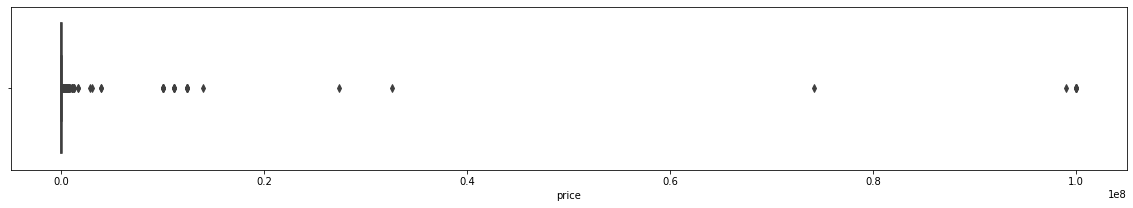

In [14]:
fig, ax = plt.subplots(figsize=(20, 3))
sns.boxplot(x='price', data=car_data)

- The Shapiro-Wilk test is a statistical test used to determine whether a data sample is normally distributed. 

- The null hypothesis for the test is that the data are normally distributed, while the alternative hypothesis is that they are not.

- The shapiro() function returns two values: the test statistic and the p-value. The test statistic is a measure of how far the sample distribution is from a normal distribution, with larger values indicating a larger departure from normality. 

- The p-value is the probability of observing the test statistic or a more extreme value under the null hypothesis.

- If the p-value is less than the chosen significance level (often 0.05), we reject the null hypothesis that the data are normally distributed, meaning that the data are unlikely to have come from a normal distribution. 

- Conversely, if the p-value is greater than the significance level, we fail to reject the null hypothesis, meaning that there is not enough evidence to conclude that the data are not normally distributed.

In [15]:
from scipy.stats import shapiro

# assume that 'data' is the variable containing the data to be tested
stat, p = shapiro(car_data['price'])

# print the test statistic and p-value
print('Test statistic:', stat)
print('p-value:', p)

# interpret the results
alpha = 0.05  # significance level
if p > alpha:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Test statistic: 0.00186997652053833
p-value: 0.0
Data does not look normally distributed (reject H0)


g:\Softwares\Python\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning:

p-value may not be accurate for N > 5000.



- Log transformation is commonly applied to target variables in regression problems to transform data that are not normally distributed into a normal or more symmetric distribution. 

- This is important because many statistical models rely on the assumption of normality for the target variable, and the transformation can help to satisfy this assumption. 

- Additionally, log transformation can help to stabilize the variance of the target variable and reduce the impact of outliers.

- In some cases, applying a log transform can also improve the interpretability of the model. 

- For example, if the target variable represents a count or a measurement that follows a power law distribution, taking the logarithm can make the relationship between the predictor variables and the target variable more linear and easier to interpret.

In [16]:
# Apply Log Transformation to Target variable "Price" column
c = 1
car_data['price'] = np.log(car_data['price'] + c)

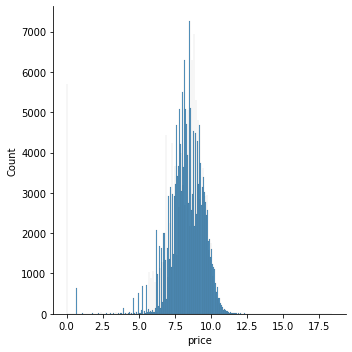

In [17]:
sns.displot(car_data['price'])

If the goal is to build a predictive model, then it may be beneficial to do outlier analysis after log transformation. This is because log transformation can reduce the impact of outliers on the model and improve the performance of the model. By identifying and removing outliers in the transformed scale, the model may become more accurate and robust.

### Outlier Analysis of Features

**1. IQR Method**

The box plot uses inter-quartile range to detect outliers. Here, we first determine the quartiles Q1 and Q3. Interquartile range is given by, 

- IQR = Q3 - Q1
- Upper limit = Q3 + 1.5 * IQR
- Lower limit = Q1 – 1.5 * IQR

Anything below the lower limit and above the upper limit is considered an outlier

**2. Winsorization**
- This technique replaces extreme values with less extreme values by truncating the distribution at a specified percentile. This approach preserves the shape of the distribution while reducing the impact of outliers. This can be useful in cases where removing the outliers is not appropriate.
- For example, the top 1% and bottom 1% of the values can be replaced with the next highest and lowest values, respectively. 
- Winsorization is particularly useful when we suspect that the outliers are due to measurement errors or data entry errors, rather than genuine extreme values that we want to preserve in our analysis.

In [19]:
from scipy.stats.mstats import winsorize

# # apply Winsorization with 10% trimming on both ends
car_data['price_winsorized'] = winsorize(car_data['price'], limits=[0.1, 0.1])

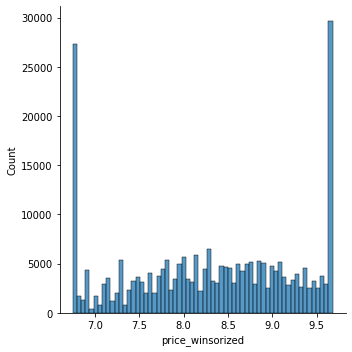

In [20]:
sns.displot(car_data['price_winsorized'])

### Converting Categorical Variables into Numerical Features

**Factorization**

Factorizing categorical data involves converting categorical variables into numerical variables by assigning a unique integer value to each category.

**Advantages:**

- Reduced memory usage: By converting categorical variables to numerical variables, the memory usage of the data is reduced as integers occupy less space than strings.

- Faster computation: Many machine learning algorithms require numerical inputs. By factorizing categorical variables, computation can be performed faster as numerical variables are easier and faster to process.

- Simplified feature engineering: Factorizing categorical variables can simplify feature engineering as numerical variables can be more easily manipulated and transformed.

In [21]:
pd.factorize(car_data['abtest']), pd.factorize(car_data['gearbox']), pd.factorize(car_data['notRepairedDamage'])

((array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
  Index(['test', 'control'], dtype='object')),
 (array([0, 1, 0, ..., 1, 0, 0], dtype=int64),
  Index(['manual', 'automatic'], dtype='object')),
 (array([0, 1, 1, ..., 1, 1, 1], dtype=int64),
  Index(['yes', 'no'], dtype='object')))

In [22]:
car_data['abtest'] = pd.factorize(car_data['abtest'])[0]
car_data['gearbox'] = pd.factorize(car_data['gearbox'])[0]
car_data['notRepairedDamage'] = pd.factorize(car_data['notRepairedDamage'])[0]

- The reason is that standardization scales the data based on the standard deviation, which makes it more robust to outliers. 

- Distance travelled in kilometers and horsepower of a car are continuous variables with a range of values, and standardization preserves the distribution of the data while transforming it to have a mean of 0 and a standard deviation of 1.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

car_data[['kilometer', 'powerPS']] = scaler.fit_transform(car_data[['kilometer', 'powerPS']])

In [24]:
car_data.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,price_winsorized
1,9.814711,0,coupe,2011,0,0.359749,unknown,0.077267,diesel,audi,0,9.680344
2,9.190240,0,suv,2004,1,0.215314,grand,0.077267,diesel,jeep,1,9.190240
3,7.313887,0,compact car,2001,0,-0.255437,golf,0.678981,gasoline,volkswagen,1,7.313887
4,8.188967,0,compact car,2008,0,-0.287533,fabia,-0.765134,diesel,skoda,1,8.188967
6,7.696667,0,convertible,2004,0,-0.073556,2_reihe,0.678981,gasoline,peugeot,1,7.696667


- When there are more than two categories in a categorical variable, one of the best encoding methods is one-hot encoding or dummy variable encoding. 

- This method creates a new binary variable for each category in the original variable, with a value of 1 indicating the presence of that category and 0 indicating its absence.

In [25]:
# Applying One-Hot Encoding
car_data_v2 = pd.get_dummies(car_data, prefix='vehicleType', prefix_sep='.', columns=['vehicleType'], dtype=float)
car_data_v2 = pd.get_dummies(car_data_v2, prefix='fuelType', prefix_sep='.', columns=['fuelType'], dtype=float)

# Encoding brand
car_data_v3 = pd.get_dummies(car_data_v2, prefix='brand', prefix_sep='.', columns=['brand'], dtype=float)

# Encoding model
car_data_v4 = pd.get_dummies(car_data_v3, prefix='model', prefix_sep='.', columns=['model'], dtype=float)

In [26]:
car_data_v2.head()

,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,brand,notRepairedDamage,price_winsorized,...,vehicleType.sedan,vehicleType.station wagon,vehicleType.suv,fuelType.diesel,fuelType.electric,fuelType.gasoline,fuelType.hybrid,fuelType.lpg,fuelType.natural gas,fuelType.other
1,9.814711,0,2011,0,0.359749,unknown,0.077267,audi,0,9.680344,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.190240,0,2004,1,0.215314,grand,0.077267,jeep,1,9.190240,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.313887,0,2001,0,-0.255437,golf,0.678981,volkswagen,1,7.313887,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,8.188967,0,2008,0,-0.287533,fabia,-0.765134,skoda,1,8.188967,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7.696667,0,2004,0,-0.073556,2_reihe,0.678981,peugeot,1,7.696667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [27]:
car_data_winsor_price = car_data_v4.drop(columns=['price'], axis=1)
car_data_price = car_data_v4.drop(columns=['price_winsorized'], axis=1)

# Feature Selection

## Heatmap

In [32]:
car_data_v2.head()

,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,brand,notRepairedDamage,price_winsorized,...,vehicleType.sedan,vehicleType.station wagon,vehicleType.suv,fuelType.diesel,fuelType.electric,fuelType.gasoline,fuelType.hybrid,fuelType.lpg,fuelType.natural gas,fuelType.other
1,9.814711,0,2011,0,0.359749,unknown,0.077267,audi,0,9.680344,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.190240,0,2004,1,0.215314,grand,0.077267,jeep,1,9.190240,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.313887,0,2001,0,-0.255437,golf,0.678981,volkswagen,1,7.313887,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,8.188967,0,2008,0,-0.287533,fabia,-0.765134,skoda,1,8.188967,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7.696667,0,2004,0,-0.073556,2_reihe,0.678981,peugeot,1,7.696667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [34]:
corr_matrix = car_data_v2.drop(columns=['price', 'model', 'brand'], axis=1).corr()

<AxesSubplot: >

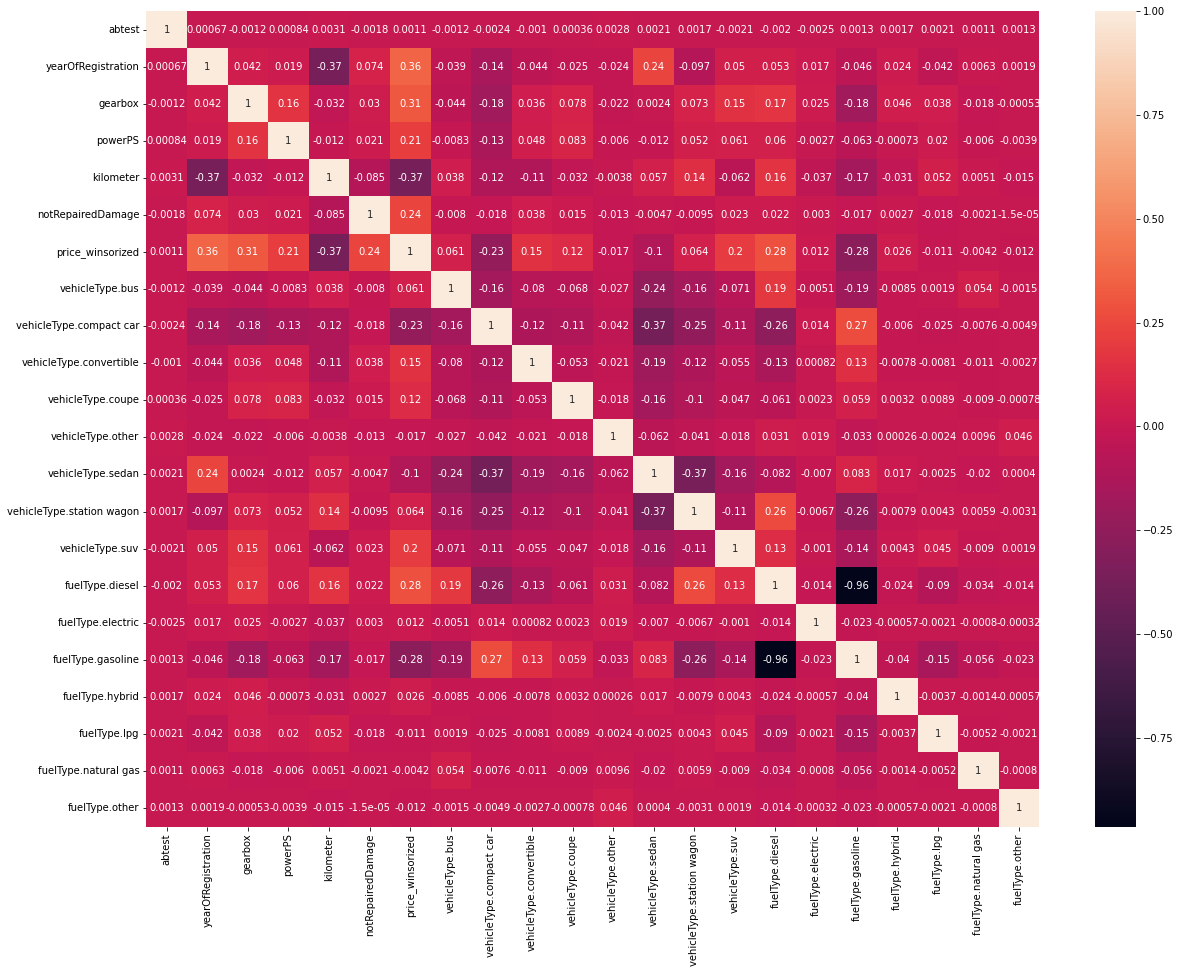

In [35]:
# Plot correlation matrix (without brand and model)
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True)

In [36]:
# Set threshold for correlation coefficient
threshold = 0.5

# Identify highly correlated features
high_corr_features = np.where(corr_matrix.abs() > threshold)

# Remove duplicate pairs
high_corr_features = [(corr_matrix.columns[x], corr_matrix.columns[y])
                      for x, y in zip(*high_corr_features)
                      if x != y and x < y]

# Print highly correlated features
print("Highly correlated features:")
for feature in high_corr_features:
    print(feature)

Highly correlated features:
('fuelType.diesel', 'fuelType.gasoline')


In [39]:
from sklearn.feature_selection import SelectKBest, f_regression, chi2

selector = SelectKBest(score_func=f_regression, k=15)

X = car_data_winsor_price.drop(columns=['price_winsorized'], axis=1)
y = car_data_winsor_price['price_winsorized']

X_new = selector.fit_transform(X, y)

# Get selected features
selected_features = X.columns[selector.get_support(indices=True)]
selected_features

Index(['yearOfRegistration', 'gearbox', 'powerPS', 'kilometer',
       'notRepairedDamage', 'vehicleType.compact car',
       'vehicleType.convertible', 'vehicleType.suv', 'fuelType.diesel',
       'fuelType.gasoline', 'brand.audi', 'brand.bmw', 'brand.mercedes_benz',
       'brand.opel', 'brand.renault'],
      dtype='object')

# Dimensionality Reduction (PCA)

In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA()
# X_pca = pca.fit_transform(X)

# # Convert to dataframe
# component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
# X_pca = pd.DataFrame(X_pca, columns=component_names)

# X_pca.head()

In [50]:
# create bins for years, e.g. every 5 years
bins = [2000, 2005, 2010, 2015, 2020]

# use the cut function to assign each year to a bin
X['year_range'] = pd.cut(X['yearOfRegistration'], bins)
X['year_range'].unique()

X = pd.get_dummies(X, prefix='year_range', prefix_sep='.', columns=['year_range'], dtype=float)
X.drop(columns=['year_bin'], inplace=True)

[(2010.0, 2015.0], (2000.0, 2005.0], (2005.0, 2010.0], (2015.0, 2020.0], NaN]
Categories (4, interval[int64, right]): [(2000, 2005] < (2005, 2010] < (2010, 2015] < (2015, 2020]]

# Modelling

In [59]:
from sklearn.model_selection import train_test_split

X = car_data_winsor_price[selected_features]
y = car_data_winsor_price['price_winsorized']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## XGBoost

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

In [61]:
xgb_model1 = xgb.XGBRegressor()
xgb_model1.fit(X_train, y_train, eval_metric="mae", early_stopping_rounds=5 ,eval_set=[(X_test,y_test)], verbose=1)

y_pred = xgb_model1.predict(X_test)

print('mean_absolute_error = ', mean_absolute_error(y_test,y_pred))
print('R2 score is ',r2_score(y_test, y_pred))
print('mean_squared_error is ', mean_squared_error(y_test, y_pred))

g:\Softwares\Python\lib\site-packages\xgboost\sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

g:\Softwares\Python\lib\site-packages\xgboost\sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-mae:5.47311
[1]	validation_0-mae:3.83170
[2]	validation_0-mae:2.68240
[3]	validation_0-mae:1.88041
[4]	validation_0-mae:1.32548
[5]	validation_0-mae:0.94693
[6]	validation_0-mae:0.69669
[7]	validation_0-mae:0.53783
[8]	validation_0-mae:0.43997
[9]	validation_0-mae:0.38305
[10]	validation_0-mae:0.35023
[11]	validation_0-mae:0.32919
[12]	validation_0-mae:0.31686
[13]	validation_0-mae:0.30927
[14]	validation_0-mae:0.30449
[15]	validation_0-mae:0.30082
[16]	validation_0-mae:0.29890
[17]	validation_0-mae:0.29704
[18]	validation_0-mae:0.29527
[19]	validation_0-mae:0.29415
[20]	validation_0-mae:0.29311
[21]	validation_0-mae:0.29226
[22]	validation_0-mae:0.29142
[23]	validation_0-mae:0.29067
[24]	validation_0-mae:0.28975
[25]	validation_0-mae:0.28921
[26]	validation_0-mae:0.28900
[27]	validation_0-mae:0.28861
[28]	validation_0-mae:0.28806
[29]	validation_0-mae:0.28716
[30]	validation_0-mae:0.28693
[31]	validation_0-mae:0.28654
[32]	validation_0-mae:0.28603
[33]	validation_0-ma

In [63]:
from sklearn.model_selection import GridSearchCV

param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

xgb_model2 = xgb.XGBRegressor()

gsearch = GridSearchCV(estimator = xgb_model2,
                        param_grid = param_tuning,                        
                        scoring = 'neg_mean_squared_error',  #MSE
                        cv = 5,
                        n_jobs = -1,
                        verbose = 1)

gsearch.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


: 

In [ ]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
best_model

In [ ]:
y_pred = best_model.predict(X_test)

print('mean_absolute_error = ', mean_absolute_error(y_test,y_pred))
print('R2 score is ',r2_score(y_test, y_pred))
print('mean_squared_error is ', mean_squared_error(y_test, y_pred))

[0]	validation_0-mae:5.47351


g:\Softwares\Python\lib\site-packages\xgboost\sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

g:\Softwares\Python\lib\site-packages\xgboost\sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-mae:3.83217
[2]	validation_0-mae:2.68341
[3]	validation_0-mae:1.88203
[4]	validation_0-mae:1.32746
[5]	validation_0-mae:0.94726
[6]	validation_0-mae:0.69426
[7]	validation_0-mae:0.53203
[8]	validation_0-mae:0.43122
[9]	validation_0-mae:0.37178
[10]	validation_0-mae:0.33734
[11]	validation_0-mae:0.31752
[12]	validation_0-mae:0.30576
[13]	validation_0-mae:0.29905
[14]	validation_0-mae:0.29499
[15]	validation_0-mae:0.29234
[16]	validation_0-mae:0.29066
[17]	validation_0-mae:0.28951
[18]	validation_0-mae:0.28872
[19]	validation_0-mae:0.28829
[20]	validation_0-mae:0.28781
[21]	validation_0-mae:0.28753
[22]	validation_0-mae:0.28735
[23]	validation_0-mae:0.28721
[24]	validation_0-mae:0.28715
[25]	validation_0-mae:0.28702
[26]	validation_0-mae:0.28696
[27]	validation_0-mae:0.28682
[28]	validation_0-mae:0.28686
[29]	validation_0-mae:0.28676
[30]	validation_0-mae:0.28679
[31]	validation_0-mae:0.28683
[32]	validation_0-mae:0.28684
[33]	validation_0-mae:0.28682
[34]	validation_0-m

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [ ]:
print('mean_absolute_error = ', mean_absolute_error(y_test,y_pred))
print('R2 score is ',r2_score(y_test, y_pred))
print('mean_squared_error is ', mean_squared_error(y_test, y_pred))

mean_absolute_error =  0.5412947916275763
R2 score is  0.41935369399964395
mean_squared_error is  0.512464152024708


## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

# Create a linear regression object
lasso = Lasso()

# Define the hyperparameters to tune
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Create a grid search object
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best hyperparameters: {'alpha': 0.0001}
Best score: 0.4949815726570578


In [ ]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
best_model

Lasso(alpha=0.0001)

In [ ]:
y_pred = best_model.predict(X_test)

print('mean_absolute_error = ', mean_absolute_error(y_test,y_pred))
print('R2 score is ',r2_score(y_test, y_pred))
print('mean_squared_error is ', mean_squared_error(y_test, y_pred))

mean_absolute_error =  0.54132065333978
R2 score is  0.41936316920792716
mean_squared_error is  0.5124557894388654


## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# Create a linear regression object
ridge = Ridge()

# Define the hyperparameters to tune
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Create a grid search object
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best hyperparameters: {'alpha': 0.0001}
Best score: 0.49498110506807436


In [ ]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
best_model

Ridge(alpha=0.0001)

In [ ]:
y_pred = best_model.predict(X_test)

print('mean_absolute_error = ', mean_absolute_error(y_test,y_pred))
print('R2 score is ',r2_score(y_test, y_pred))
print('mean_squared_error is ', mean_squared_error(y_test, y_pred))

mean_absolute_error =  0.541294791660196
R2 score is  0.4193536939776067
mean_squared_error is  0.5124641520441575


## 